# GIGO (Garbage In Garbage Out)
- 머신러닝에서 제일 중요한 요소 중 하나는 깨끗한 데이터를 사용하는 것
- 똑같은 데이터세트를 사용하더라도, 데이터의 전처리나, 분석 방법 등에 따라서 성능이 굉장히 많이 차이가 난다.

캘리포니아 데이터셋 다운받기

In [ ]:
# 사용할 데이터셋 다운로드 하기
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing") # 디렉토리 설정하기 - /기본 경로/datasets/housing
HOUSING_URL  = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" # 다운로드 할 파일의 URL

def fetch_housing_data(housing_url= HOUSING_URL, housing_path= HOUSING_PATH):
  os.makedirs(housing_path, exist_ok= True) # 디렉토리 만들기
  tgz_path = os.path.join(housing_path, "housing.tgz") # 파일의 경로
  urllib.request.urlretrieve(housing_url, tgz_path) # URL로 지정한 파일을 다운로드
  housing_tgz = tarfile.open(tgz_path) # 다운 받은 파일 열기
  housing_tgz.extractall(path= housing_path) # 압축 파일(housing.tgz) 압축 풀기
  housing_tgz.close() # 파일 닫기

fetch_housing_data()

In [ ]:
# 다운 받은 데이터셋(csv) 파일을 pandas 데이터 프레임으로 만들기
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH, filename="housing.csv"):
  csv_path = os.path.join(housing_path, filename) # os.path.join("/datasets/housing", "housing.csv") -> /datasets/housing/housing.csv
  return pd.read_csv(csv_path) # 데이터 프레임 리턴

# 데이터 세트를 확인

In [ ]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# housing 데이터 알아보기
각 컬럼의 의미를 살펴보기

* longitude : 경도
* latitude : 위도
* housing_median_age : 중간 주택 연도
* total_rooms : 방의 총 개수
* total_bedrooms : 침실의 총 개수
* population : 인구
* households : 가구
* median_income : 중간 소득
* median_house_value : 중간 주택 가격
* ocean_proximity : 바다와의 거리


# 데이터 프레임의 기본 정보 확인

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# 데이터 프레임의 통계적 특성 확인

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 데이터의 형태를 빠르게 검토 - 시각화

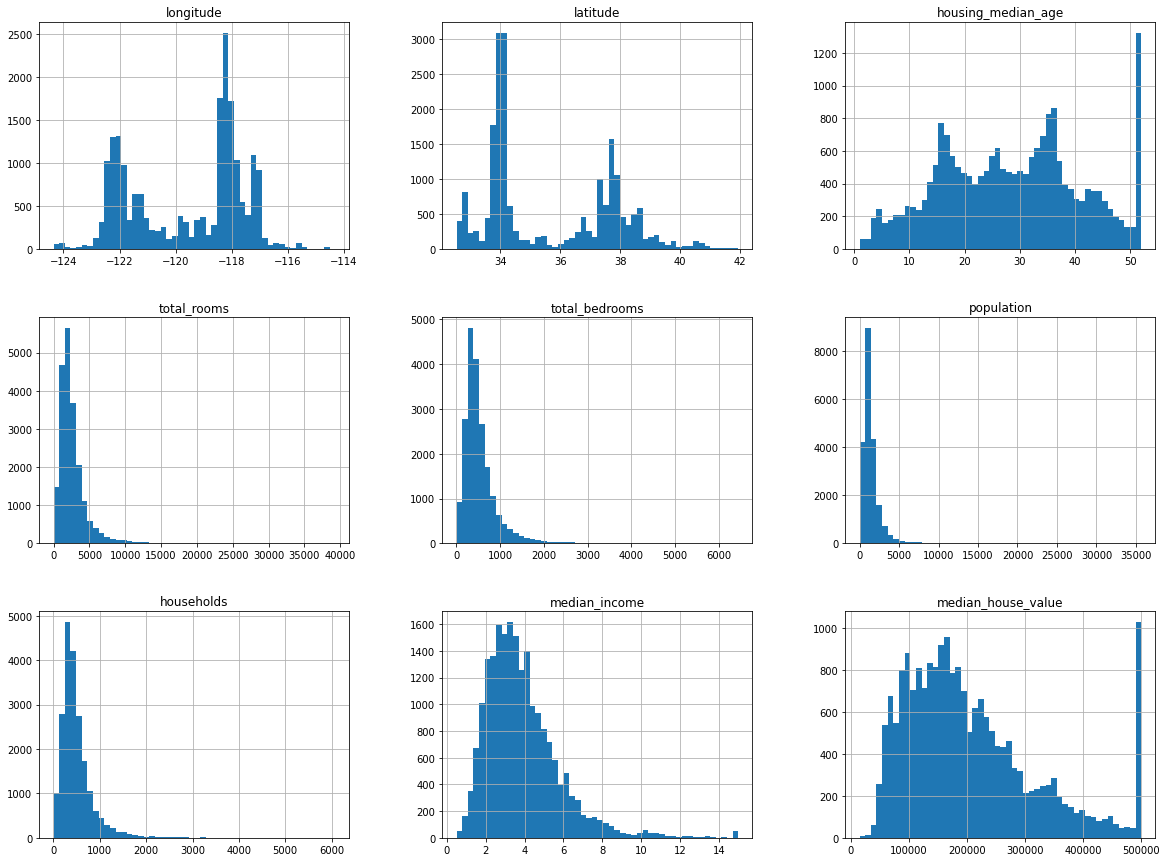

In [ ]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15) )
plt.show()

# 테스트 데이터 세트 만들기
- 전체 데이터세트를 활용해서 훈련하는 바람에 사용자의 새로운 데이터에 대한 예측이 잘 안되는 현상을 **데이터 스누핑 편향**
- 테스트 세트를 따로 만들어서 훈련 세트로 알고리즘을 훈련 후에 테스트 세트의 오차를 **일반화 오차**

## 데이터 쪼개기(split)
* 훈련 세트와 테스트 세트의 비율은 8:2 또는 7:3 정도로 설정. 7.5 : 2.5로 설정

테스트 세트를 생성할 때는 **전체 데이터를 한번 섞고(Shuffle) 잘라야(Split)**한다.


<table>
  <tr>
    <th>index</th>
    <th>feature 1</th>
    <th>feature 2</th>
    <th>feature 3</th>
    <th>label</th>
  </tr>
  <tr>
    <td>0</td>
    <td>8.96</td>
    <td>11.91</td>
    <td>3.78</td>
    <td>0</td>
  </tr>
  <tr>
    <td>1</td>
    <td>4.12</td>
    <td>3.11</td>
    <td>7.90</td>
    <td>0</td>
  </tr>
  <tr>
    <td>...</td>
    <td>5.15</td>
    <td>9.12</td>
    <td>10.56</td>
    <td>0</td>
  </tr>
  <tr>
    <td>99</td>
    <td>6.86</td>
    <td>10.12</td>
    <td>27.81</td>
    <td>0</td>
  </tr>
  <tr>
    <td>100</td>
    <td>3.74</td>
    <td>1.12</td>
    <td>2.81</td>
    <td>1</td>
  </tr>
  <tr>
    <td>101</td>
    <td>5.12</td>
    <td>7.85</td>
    <td>10.1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>...</td>
    <td>12.11</td>
    <td>8.98</td>
    <td>10.75</td>
    <td>1</td>
  </tr>
  <tr>
    <td>199</td>
    <td>1.31</td>
    <td>10.04</td>
    <td>7.22</td>
    <td>1</td>
  </tr>
</table>

In [ ]:
# 무작위로 데이터를 선택
import numpy as np

np.random.permutation(100) # 0 ~ 99 까지의 정수 100개를 랜덤하게 생성

array([84, 81, 82, 11, 37, 23, 12, 50, 16, 61, 71, 62, 39, 42, 18, 26, 77,
        6, 45, 76, 38, 97,  2, 66, 88, 10, 29, 75, 73, 93, 78, 74, 79, 65,
       58, 68, 21, 98,  0, 40, 72, 20, 86, 27, 60,  9, 63, 96, 31, 91, 13,
        8, 69, 94, 83, 22, 54, 70, 19, 52, 55, 48, 15, 32, 67, 36, 49, 53,
       44, 28, 17, 57, 35,  7, 47,  1, 14, 80, 64, 46, 25, 30, 85, 99, 87,
       34, 24,  4,  3, 89, 43, 92, 33,  5, 51, 59, 90, 41, 56, 95])

In [ ]:
def my_split_train_test(data, test_ratio=0.2):
  # 데이터 개수 만큼 무작위 인덱스를 가진 리스트 생성
  shuffled_indices = np.random.permutation(len(data))

  # 테스트 세트의 크기
  test_set_size = int(len(data) * test_ratio)

  # 테스트 세트의 인덱스 구하기
  test_indices = shuffled_indices[ : test_set_size]

  # 훈련 세트의 인덱스 구하기
  train_indices = shuffled_indices[test_set_size : ]

  return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
df_train, df_test = my_split_train_test(housing)
print(f"훈련 세트의 길이 : {len(df_train)} / 테스트 세트의 길이 : {len(df_test)}")

훈련 세트의 길이 : 16512 / 테스트 세트의 길이 : 4128


#### 단순 랜덤으로 잘랐을 때의 단점
같은 데이터 세트를 이용해서 훈련을 할 때, 무한히 훈련을 한다면 모든 데이터가 훈련 세트 또는 테스트 세트가 된다.

해결 방안
1. `random seed`를 활용해서 항상 똑같은 랜덤을 가질 수 있게
  - 데이터의 크기가 변화가 없는 경우
2. 각 행마다 `hash`값을 구하여 잘라내는 방법
  - 데이터의 크기가 자주 변경되는 경우

In [ ]:
# 1. 랜덤 고정(random seed)
np.random.seed(42)
np.random.permutation(10)

array([8, 1, 5, 0, 7, 2, 9, 4, 3, 6])

In [ ]:
# 2. hash value ( 고윳값 )
# hello -> f12ab20df1
# hella -> d391abdf9b
# 랜덤이 아니고 해시값을 활용해서 자르는 방법
from zlib import crc32

# True : 테스트 세트로 들어갈 identifier
# False : 훈련 세트로 들어갈 identifier
def test_set_check(identifer, test_ratio):
  return crc32(np.int64(identifer)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column] # 고유한 데이터로 사용할 시리즈를 선택
  in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio)) # 고윳값인 해시값을 토대로 데이터가 테스트 세트가 될지(True),
                                                                        # 훈련 세트가 될지(False)
  # in_test_set의 모양 : [ True, False True, True, False ... ]
  return data.loc[~in_test_set], data.loc[in_test_set]

#### 미리 만들어진 함수 활용하기
대표적인 머신러닝 라이브러리인 사이킷 런(scikit-learn)에 각종 머신러닝을 위한 도구들이 준비되어 있다.

```
pip install scikit-learn
```

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    housing,       # split할 데이터 세트
    test_size=0.2,  # 테스트 세트의 크기
    random_state=42 # 랜덤 시드 지정
)

# 샘플링 편향과 계층적 샘플링
1. `median_income`은 `label`인 `median_house_value`를 예측하는데 있어서 매우 중요한 데이터다
2. 그런데, `median_income`은 저소득 구간에 편중되어 있는 데이터
3. 단순하게 랜덤이나 해쉬로만 나누게 되면 데이터의 비중이 적은 고소득 구간은 훈련 데이터 세트에 포함이 안될 가능성이 커진다.
  - 저소득 구간 데이터만 훈련 세트에 들어갈 가능성이 커진다. - **샘플링 편향**

In [ ]:
# 구간 만들기
housing["income_cat"] = pd.cut(
    housing["median_income"], # 구간을 나눌 대상이 되는 시리즈
    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf], # 구간 나누기
    labels=[1, 2, 3, 4, 5]
)

housing[["median_income", "income_cat"]].head(10)

,median_income,income_cat
0,8.3252,5
1,8.3014,5
2,7.2574,5
3,5.6431,4
4,3.8462,3
5,4.0368,3
6,3.6591,3
7,3.1200,3
8,2.0804,2
9,3.6912,3


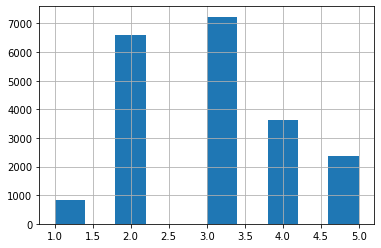

In [ ]:
housing["income_cat"].hist()

In [ ]:
# 계층적 샘플링 하기
from sklearn.model_selection import StratifiedShuffleSplit

spliter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

result = spliter.split(
    housing, # 자를 대상 데이터
    housing['income_cat']) # 잘라질 계층 데이터

for train_idx, test_idx in result:
  strat_train_set = housing.loc[train_idx]
  strat_test_set  = housing.loc[test_idx]

In [ ]:
# train_test_split 에 계층적 분할을 위한 옵션 stratify 옵션
train_set, test_set = train_test_split(housing,
                                       test_size=0.2,
                                       stratify=housing["income_cat"])

In [ ]:
from sklearn.model_selection import train_test_split

def income_cat_proportions(data):
    print(data.columns)
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "전체": income_cat_proportions(housing),
    "계층 샘플링": income_cat_proportions(strat_train_set),
    "무작위 샘플링": income_cat_proportions(test_set),
}).sort_index()

compare_props["무작위 샘플링 오류율"] = 100 * compare_props["무작위 샘플링"] / compare_props["전체"] - 100
compare_props["계층 샘플링 오류율"] = 100 * compare_props["계층 샘플링"] / compare_props["전체"] - 100
compare_props

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')


,전체,계층 샘플링,무작위 샘플링,무작위 샘플링 오류율,계층 샘플링 오류율
1,0.039826,0.039789,0.040213,0.973236,-0.091241
2,0.318847,0.318859,0.324370,1.732260,0.003799
3,0.350581,0.350594,0.358527,2.266446,0.003455
4,0.176308,0.176296,0.167393,-5.056334,-0.006870
5,0.114438,0.114462,0.109496,-4.318374,0.021169


# 데이터 세트 EDA(Exploratory Data Analysis)

In [ ]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3


### 시각화

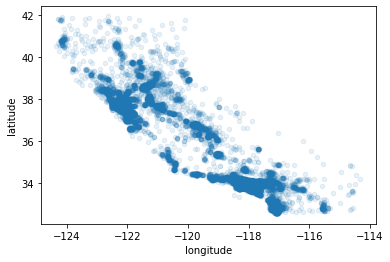

In [ ]:
housing.plot(
    kind='scatter',
    x='longitude', # 경도
    y="latitude",   # 위도
    alpha=0.1
)
plt.show()

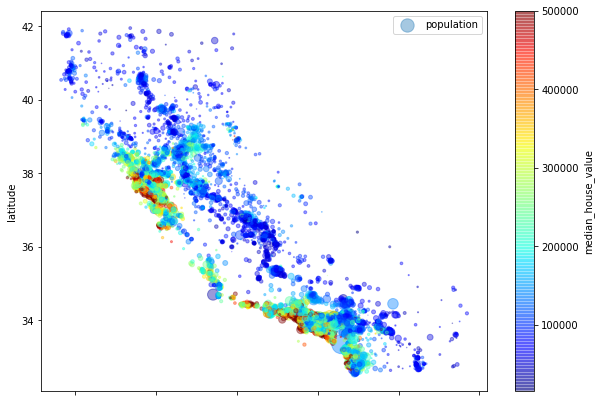

In [ ]:
# 비즈니스적으로 봤을 때, 사람이 많이 밀집해서 사는 지역의 집값이 비싸다는 것을 시각적으로 표현
housing.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    alpha=.4,
    figsize=(10, 7),
    s = housing['population'] / 100,
    label='population',
    c='median_house_value', # color를 표현할 컬럼의 이름
    cmap=plt.get_cmap('jet'), # 무지개색으로 표현
    colorbar=True
)

plt.legend()
plt.show()

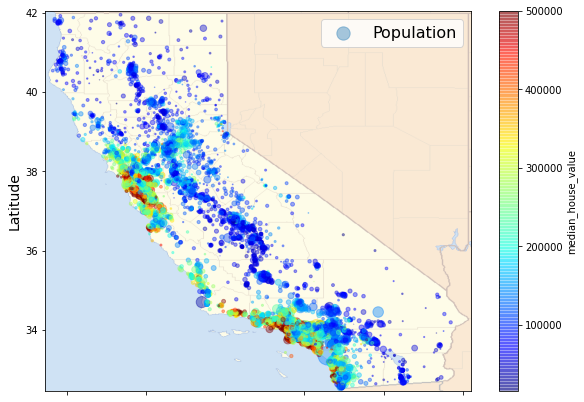

In [ ]:
import matplotlib.image as mpimg

images_path = os.path.join(".", "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))
california_img=mpimg.imread(os.path.join(images_path, filename))

ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=True, alpha=0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend(fontsize=16)
plt.show()

### 상관관계 조사하기

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False) # 집 값에 대한 상관관계를 파악

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

### 머신러닝을 위한 데이터 분석의 꽃 특성 조합

In [ ]:
# 가구 당 방이 몇개인가 - 비율
# 전체 방 중에서 침실이 차지하는 비율
# 가구당 인구수

housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing['total_rooms']
housing["population_per_household"] = housing["population"] / housing["households"]

In [ ]:
# 특성 추가 후 상관관계 파악
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# 파이프라인
- 일련의 작업들을 하나의 프로세스로 묶는 것
- 수동으로 일일이 작업을 실행하도록 하는게 아닌, 함수를 만들어서 자동화 시키는 것이 목적

In [ ]:
# feature, label 분리

# 머신러닝 y = f(X)

# feature : X ( 예측을 하기 위한 데이터 )
# label : y ( 예측의 결과물  - 정답 또는 target)

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

머신러닝을 위한 데이터 파이프라인은 대부분 데이터 변환 작업이 우선

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


`nan`값에 대한 처리를 어떻게 할 것인가?
- 해당 샘플을 삭제(행 삭제)
- 해당 특성을 삭제(열 삭제)
- 특정 값으로 채우는 방법
  - 0 또는 평균, 중간값 등으로 채운다.
  - `NaN`값이 들어있는 특성(`feautre`)을 `label`로 놓는 새로운 머신러닝 모델을 생성해서 예측 후 채우는 방식

In [ ]:
# housing.dropna(subset=['total_bedrooms']) # NaN값이 들어있는 샘플을 삭제
# housing.drop("total_bedrooms", axis=1) # total_bedrooms 특성 삭제

# 중간값 구하기
# median_value = housing["total_bedrooms"].median() # total_bedrooms의 중간값 구하기
# housing["total_bedrooms"].fillna(median_value, inplace=True) # fillna : nan값을 설정한 값으로 채우는 함수.

누락값을 다룰 수 있는 사이킷 런 클래스 - `SimpleImputer`
- 누락값을 채울 수 있는 정책(전략)을 선정해서 누락값을 채운다.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # 데이터의 누락값을 채울 전략으로 중간값(median) 선정

중간값이 수치형 특성(숫자 특성)에만 적용되기 때문에 `ocean_proximity`는 따로 빼 놓고, `income_cat`는 삭제

In [ ]:
# income_cat 삭제
del housing["income_cat"]
del strat_test_set["income_cat"]
del strat_train_set["income_cat"]

In [ ]:
# 문자열 카테고리 데이터인 ocean_proximity는 사용을 안할 거에요
# 숫자 데이터만 남아있는 housing_num 생성
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
# 변환된 데이터 보기(아직 데이터에 대한 변환은 일어나지 않은거.... 계산만 된 것!!!)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
# 변환 수행 - transform
X = imputer.transform(housing_num) # housing_num의 중간값을 계산해서 적용된(채워 놓고) 형태로 변환
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [ ]:
housing_tr = pd.DataFrame(
    X,
    columns=housing_num.columns,
    index=housing_num.index # 인덱스가 바뀌면 안되니까 기존의 인덱스를 그대로 가져옴
)

housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [ ]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [ ]:
# housing_num의 누락값을 채우기 위해서 Imputer에 housing_num을 집어 넣고, housing_num을 변환시킴
# fit -> housing_num, transform -> housing_num
# imputer.fit(housing_num).transform(housing_num)
# imputer.fit_transform(housing_num)

# 텍스트와 범주형(categorical) 특성 다루기 ★★★★★★★★★★★★★★★

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat["ocean_proximity"].unique()

array(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

머신러닝에 들어가는 데이터는 반드시 수치형( 정수 or 실수 ) 데이터만 들어가요

* <1H OCEAN --> 0
* INLAND --> 1
* ISLAND --> 2
* NEAR BAY --> 3
* NEAR OCEAN --> 4

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat.values)

print(housing_cat.values)
print(housing_cat_encoded)

[['INLAND']
 ['NEAR OCEAN']
 ['INLAND']
 ...
 ['<1H OCEAN']
 ['<1H OCEAN']
 ['INLAND']]
[[1.]
 [4.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]


In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

위 처럼 인코딩을 했을 때 머신러닝 알고리즘은 이렇게 생각한다.
- 0번과 1번은 비슷한 데이터다.
- 0번과 4번은 매우 다른 데이터다.
- `INLAND` + `INLAND` = `ISLAND`

축구, 야구, 농구
- 축구를 표현 : `축구 1, 야구 0, 농구 0`
- 농구를 표현 : `축구 0, 야구 0, 농구 1`



<table>
  <tr>
    <th>축구</th>
    <th>야구</th>
    <th>농구</th>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td>
    <td>0</td>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>1</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td>
    <td>0</td>
  </tr>
</table>

- 카테고리를 각각 표현하기 위한 특성이 추가되어야 한다. - **더미(DUMMY) 특성**
- 위의 표와 같이 여러 범주 중 하나만 표현하고(강조) 나머지는 강조하지 않는 인코딩 방식 : **One Hot Encoding**

In [ ]:
# 사이킷런의 OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

housing_cat_one_hot = cat_encoder.fit_transform(housing_cat)
housing_cat_one_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
# toarray() 함수를 이용해서 2차원 매트릭스 형태로 확인 가능
housing_cat_one_hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
housing_cat_one_hot_df = pd.DataFrame(
    housing_cat_one_hot.toarray(),
    columns = cat_encoder.categories_,
    index = housing_cat.index
)

housing_cat_one_hot_df.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,0.0,1.0,0.0,0.0,0.0
15502,0.0,0.0,0.0,0.0,1.0
2908,0.0,1.0,0.0,0.0,0.0
14053,0.0,0.0,0.0,0.0,1.0
20496,1.0,0.0,0.0,0.0,0.0


# 변환기( Transformer ) 사용자 정의
- 비즈니스를 위한 변환
- 사이킷런과 연동되는 사용자 정의 변환기

## Scikit-Learn 등록을 위한 과정
- `BaseEstimator` 클래스 상속
  - 추후에 만들 파이프라인에 클래스가 등록이 가능하게 됩니다.
- 사이킷런의 `TransformerMixin` 클래스 상속
  - `fit_transform()` 자동으로 구현

`fit()`, `transform()` 메소드 구현은????

### Duck Typing 문법
- 메소드 구현에 의해서 클래스의 정체성이 결정되는 것
  - `fit()`, `transform()` 메소드를 개발자가 정의를 하면 `Transformer` 클래스로 인식하게 할 예정

In [ ]:
class A:
  def foo(self):
    print("Here is A")

class B:
  def foo(self):
    print("Here is B")

class C:
  def goo(self):
    print("Here is C")

def who_are_you(who):
  who.foo()

In [ ]:
# a, b, c는 서로 다른 클래스로 만들어진 다른 객체
# 새끼 오리
a = A()
b = B()
c = C()

# who_are_you : 엄마 오리
who_are_you(a)
who_are_you(b)
who_are_you(c)

Here is A
Here is B


AttributeError: ignored

# 변환기(Transformer) 만들기


In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin): # 1. BaseEstimator, TransformerMixin 클래스 상속
  rooms_ix = 3
  bedrooms_ix = 4
  population_ix = 5
  households_ix = 6

  # 2. population_per_households 특성 조합을 해봤는데, 딱히 효과가 없는 것 같음
  # 선택에 따라서 (boolean) 추가 할 때 / 추가 하고 싶지 않을 때에 대한 설정을 할 것
  def __init__(self, add_population_per_households=True):
    self.add_population_per_households = add_population_per_households

  # 3. fit 구현
  # fit은 아무일도 하지 않아도 형식만은 지켜야 duck typing 문법이 적용된다.
  #   - transform에서 필요한 데이터를 준비 시키는 역할
  def fit(self, X):
    return self # fit_transform() -> fit().transform()

  # 4. transform 구현
  # 실제 데이터 변환을 구현
  def transform(self, X):
    rooms_per_households = X[:, self.rooms_ix] / X[:, self.households_ix]
    bedrooms_per_rooms   = X[:, self.bedrooms_ix] / X[:, self.rooms_ix]

    if self.add_population_per_households:
      population_per_households = X[:, self.population_ix] / X[:, self.households_ix]
      return np.c_[X, rooms_per_households, bedrooms_per_rooms, population_per_households]

    else:
      return np.c_[X, rooms_per_households, bedrooms_per_rooms]

In [ ]:
attr_adder = CombinedAttributesAdder(
    True
)

housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs[:3]

array([[-121.46, 38.52, 29.0, 3873.0, 797.0, 2237.0, 706.0, 2.1736,
        'INLAND', 5.485835694050992, 0.20578363026077975,
        3.168555240793201],
       [-117.23, 33.09, 7.0, 5320.0, 855.0, 2015.0, 768.0, 6.3373,
        'NEAR OCEAN', 6.927083333333333, 0.16071428571428573,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, 1618.0, 310.0, 667.0, 300.0, 2.875,
        'INLAND', 5.3933333333333335, 0.1915945611866502,
        2.223333333333333]], dtype=object)

In [ ]:
housing.values

array([[-121.46, 38.52, 29.0, ..., 706.0, 2.1736, 'INLAND'],
       [-117.23, 33.09, 7.0, ..., 768.0, 6.3373, 'NEAR OCEAN'],
       [-119.04, 35.37, 44.0, ..., 300.0, 2.875, 'INLAND'],
       ...,
       [-122.72, 38.44, 48.0, ..., 172.0, 3.1797, '<1H OCEAN'],
       [-122.7, 38.31, 14.0, ..., 501.0, 4.1964, '<1H OCEAN'],
       [-122.14, 39.97, 27.0, ..., 197.0, 3.1319, 'INLAND']], dtype=object)

# 특성 스케일링
- `Min-Max` 스케일링
  - 데이터의 단위를 `0 ~ 1` 사이로 맞춘다.
  - 최소값을 0, 최댓값을 1로 놓고 그 사이의 같은 비율로 맞춰준다.
  - 정규화 ( Normalization )
- `Standard` 스케일링
  - 평균값을 모든 데이터에서 빼주고 표준편차로 나눠준다.
  - 평균이 0이되고, 분산이 1로 된다.
  - 데이터를 골고루 펼쳐주는 역할을 해준다.
    - Outlier 처리에 강건
  - 표준화 ( Generalization )


# 파이프라인 만들기
- 데이터를 변환하는 과정은 매우 많고, 항상 **정확한 순서**대로 수행되어야 한다.
- 사이킷런의 Pipeline 클래스는 전처리 및 모델의 예측 순서를 항상 순차적으로 수행할 수 있도록 도와준다.

-----

1. 누락값 채우기(`SimpleImputer`)
2. 추가특성 생성(`CombinedAttributesAdder`)
3. 스케일 조정(`StandardScaler`)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 수치형(Numeric) 데이터를 처리할 파이프라인 생성
num_pipeline = Pipeline([
  ("imputer", SimpleImputer(strategy='median')),
  ("add_attr", CombinedAttributesAdder()),
  ("std_scaler", StandardScaler())
])

num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('add_attr', CombinedAttributesAdder()),
                ('std_scaler', StandardScaler())])

In [ ]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [ ]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr[:5]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526, -0.12112176,
         0.00622264],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.81086696,
        -0.04081077],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.33827252,
        -0.07537122],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997,  0.96120521,
        -0.10680295],
       [ 0.43743108, -0.63581817, -0.13148926,  0.42717947,  0.27279028,
         0.37406031,  0.22089846,  0.32575178,  0.2512412 , -0.47451338,
         0.00610923]])

파이프라인 생성 시 주의할 점
- 마지막 단계 이전은 반드시 모두 **Transformer**여야만 한다.
  - `fit()`, `transform()` 또는 `fit_transform()` 메소드가 반드시 있어야 한다.
- 마지막 단계에는 `Transformer`, `Estimator` 모두 사용 가능!

In [ ]:
from sklearn.compose import ColumnTransformer # 컬럼 별로 각각 다른 변환을 적용

num_feature_name = list(housing_num.columns) # 수치형 데이터의 컬럼명 리스트
cat_feature_name = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
  ("num", num_pipeline, num_feature_name),
  ("cat", OneHotEncoder(), cat_feature_name)
])

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [ ]:
housing_final = full_pipeline.fit_transform(housing)
housing_final[:5]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526, -0.12112176,
         0.00622264,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.81086696,
        -0.04081077,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.33827252,
        -0.07537122,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997,  0.96120521,
        -0.10680295,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

# 머신러닝 알고리즘 선택

선형회귀(LinearRegression) 알고리즘 사용하기

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_final, housing_labels) # 훈련

LinearRegression()

In [ ]:
# 훈련된 데이터를 이용해서 예측
example_train_data = housing.iloc[:5]
example_labels     = housing_labels[:5]

In [ ]:
example_train_prepared = full_pipeline.transform(example_train_data)
example_train_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526, -0.12112176,
         0.00622264,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.81086696,
        -0.04081077,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.33827252,
        -0.07537122,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997,  0.96120521,
        -0.10680295,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [ ]:
pred = lin_reg.predict(example_train_prepared)
label = list(example_labels)

print("예측 : {}".format(pred))
print("타깃 : {}".format(label))

예측 : [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
타깃 : [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


# 모델의 성능 평가

- 정확도(Accuracy)
  - 10개의 데이터가 존재. 한개만 0이고 나머지가 1이에요
    - 10개를 아무 생각하지 않고 1로만 다 예측을 해도 정확도가 90%
  - 100개의 데이터가 존재. 10개만 0이고 나머지가 1이에요
    - 100개를 아무 생각하지 않고 1로만 다 예측을 해도 정확도가 90%
  - 1억개의 데이터가 존재, 천만개가 0이고 나머지가 1이에요
    - 1억개를 아무 생각하지 않고 1로만 다 예측을 해도 정확도가 90%

- 오차(Error 또는 Loss)
  - 모델이 얼마나 잘 못맞췄는지를 평가

$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-t_i)^{2}}
$$

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-t_i)^{2}
$$

- $y$ : 모델의 예측값
- $t$ : 타겟(정답)
- $n$ : 데이터의 개수

MSE : Mean Squared Error 평균 제곱 오차

In [ ]:
# 선형회귀 모델은 훈련 데이터에 대해서 얼마나 오차를 내는가? (RMSE)
from sklearn.metrics import mean_squared_error

# 훈련 시에 사용했던 데이터를 그대로 예측
housing_pred = lin_reg.predict(housing_final) # 예측값 y

# MSE
lin_mse = mean_squared_error(housing_labels, housing_pred)

# RMSE
lin_rmse = np.sqrt(lin_mse)

print(f"MSE : {lin_mse} / RMSE : {lin_rmse}")

MSE : 4709785076.060029 / RMSE : 68627.87390018745


In [ ]:
# tree 모델 사용해보기
#  선형회귀 모델에 비해서 훨씬 복잡하게 데이터를 분석
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_final, housing_labels)

DecisionTreeRegressor()

In [ ]:
# tree에 대한 rmse 점수
housing_pred = tree_reg.predict(housing_final)

tree_mse = mean_squared_error(housing_labels, housing_pred)
tree_rmse = np.sqrt(tree_mse)

print(f"MSE : {tree_mse} / RMSE : {tree_rmse}")

MSE : 0.0 / RMSE : 0.0


훈련 세트에 대해서 오차가 없는 완벽한 모델을 만든 것..
* 새로운 데이터에 대한 오차는 어떻게 될까가 불투명하다..
* 테스트 세트를 써볼까..? `NO!`
* 테스트 세트는 런칭 직전에 한번 돌려보기 위한 세트...

# 교차 검증(Cross Validation)
- 테스트 세트는 서비스 런칭 직전에 평가를 위해서 남겨놔야 한다.
- 훈련 세트로만 모델을 검증(Validation)하는 단계가 필요
- **훈련 세트를 다시 한번 훈련 / 검증**세트로 나누는 작업이 필요하다.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    tree_reg, # 모델
    housing_final, # 훈련할 feature(X값)
    housing_labels, # 훈련할 label (y값)
    cv=10, # Cross Validation 횟수. Fold의 개수가 된다.
    scoring='neg_mean_squared_error'
)

tree_rmse = np.sqrt(-scores)
print(tree_rmse.mean())

71206.46969278452


* `score` : 맞춘게 많아야 좋다. ( 높은게 좋음 )
* `mean_squared_error` : 오차가 낮아야 좋다. ( 숫자가 작은게 좋음 )
* `neg_mean_squared_error` : 오차가 낮은게 많을 수록 좋다. ( 숫자가 큰게 좋음 )


In [ ]:
lin_scores = cross_val_score(
    lin_reg,
    housing_final,
    housing_labels,
    cv=10,
    scoring="neg_mean_squared_error"
)

lin_rmse = np.sqrt(-lin_scores)
print(lin_rmse.mean())

69104.07998247063


앙상블 모델 활용해 보기
- 랜덤 포레스트 모델

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_final, housing_labels)

# 교차검증 하지 않고 rmse 확인하기
forest_pred = forest_reg.predict(housing_final)
forest_mse  = mean_squared_error(housing_labels, forest_pred)
forest_rmse = np.sqrt(forest_mse)

print("교차 검증 하지 않은 RF의 점수 : {:.3f}".format(forest_rmse))

교차 검증 하지 않은 RF의 점수 : 18706.710


In [ ]:
# 교차 검증을 한 rmse 점수 확인하기
forest_mse_scores = cross_val_score(
    RandomForestRegressor(),
    housing_final,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)
forest_rmse_scores = np.sqrt(-forest_mse_scores)
print("교차 검증 RF의 점수 : {:.3f}".format(forest_rmse_scores.mean()))

교차 검증 RF의 점수 : 50377.136


모델의 복잡도를 조절해서 성능을 개선시키기
* 하이퍼 파라미터
  - 개발자가 모델에 넣어주는 옵션(파라미터)
  - 모델이 학습하지 못하는 파라미터
  - 개발자가 어떤 하이퍼 파라미터를 넣어줘야 최적의 파라미터인지 검사 -> **GridSearch**
* 모델 파라미터
  - 머신러닝 모델이 직접 학습하는 파라미터

일반적으로 GridSearch만 하는 것이 아닌, Cross Validation까지 같이 진행.

In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터의 목록을 준비
# 하이퍼 파라미터를 dict로 준비하고, 리스트로 묶어준다.

# key : 하이퍼 파라미터의 이름(매개변수명), value : 파라미터의 값으로 사용할 리스트
opt1 = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

opt2 = {
    "bootstrap": [False],
    "n_estimators": [3, 10],
    "max_features": [2, 3, 4]
}

params = [ opt1, opt2 ]

grid_search = GridSearchCV(
    RandomForestRegressor(), # 모델 객체
    params, # 하이퍼 파라미터의 목록
    cv=5, # Cross Validation 횟수
    scoring="neg_mean_squared_error",
    return_train_score=True # 점수 확인 여부
)

# 훈련은 따로
grid_search.fit(housing_final, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# 1. 제일 점수가 좋았던 하이퍼 파라미터 확인
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
# 2. 제일 점수가 좋았던 모델 가져오기
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [ ]:
# 각 하이퍼 파라미터에 대한 결과 확인( Cross Validation 결과 )
res = grid_search.cv_results_

for mean_score, params in zip(res["mean_test_score"], res["params"]):
  print(np.sqrt(-mean_score), params)

64166.51109834315 {'max_features': 2, 'n_estimators': 3}
55625.83075139373 {'max_features': 2, 'n_estimators': 10}
52623.792196029994 {'max_features': 2, 'n_estimators': 30}
60977.21925822071 {'max_features': 4, 'n_estimators': 3}
52595.17647067697 {'max_features': 4, 'n_estimators': 10}
50716.32605537627 {'max_features': 4, 'n_estimators': 30}
58333.61860607988 {'max_features': 6, 'n_estimators': 3}
52234.435287315 {'max_features': 6, 'n_estimators': 10}
49864.04680930741 {'max_features': 6, 'n_estimators': 30}
58915.35744503176 {'max_features': 8, 'n_estimators': 3}
52347.87530521831 {'max_features': 8, 'n_estimators': 10}
50077.922073884925 {'max_features': 8, 'n_estimators': 30}
62178.06628838347 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54128.56664180367 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60555.223828826805 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52706.3496359516 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
# 테스트 세트 가져오기
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


In [ ]:
# feature 마련하기
X_test = strat_test_set.drop("median_house_value", axis=1)

# label 마련하기
y_test = strat_test_set["median_house_value"].copy()

# ⭐️⭐️⭐️⭐️⭐️절대 테스트 세트를 위한 Transformer를 따로 만들면 안된다!!!!!!!⭐️⭐️⭐️⭐️⭐️
X_test_final = full_pipeline.transform(X_test)

final_pred = final_model.predict(X_test_final)

final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

47905.19892604984


In [ ]:
X_test_predictions = final_model.predict(X_test_final)
# 위 추정값이 얼마나 정확한지를 알기 위해 일반화 오차의 95% 신뢰 구간 계산
from scipy import stats
confidence = 0.95

# 1. 각 샘플의 오차의 제곱을 구한다.
squared_error = (X_test_predictions - y_test) ** 2
np.sqrt(
    stats.t.interval(
        confidence,
        len(squared_error) - 1,
        loc=squared_error.mean(),
        scale=stats.sem(squared_error)
    )
)

array([45946.01700429, 49787.34467443])